In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime

In [68]:
# set dates
today = datetime.date.today()
week_ago = today - datetime.timedelta(7)
month_ago = today - datetime.timedelta(30)
year_ago = today - datetime.timedelta(365)

print(today)
print(week_ago)
print(month_ago)
print(year_ago)

2020-03-09
2020-03-02
2020-02-08
2019-03-10


In [69]:
assets = ['BTC','ETH','XRP','BCH','Gold','S&P500']

big_df = pd.DataFrame(index=assets, columns=['price','week','month','year'])
week_df = pd.DataFrame(index=assets, columns=[week_ago + datetime.timedelta(x) for x in range(7)])

print(big_df)
print(week_df)

       price week month year
BTC      NaN  NaN   NaN  NaN
ETH      NaN  NaN   NaN  NaN
XRP      NaN  NaN   NaN  NaN
BCH      NaN  NaN   NaN  NaN
Gold     NaN  NaN   NaN  NaN
S&P500   NaN  NaN   NaN  NaN
       2020-03-02 2020-03-03 2020-03-04 2020-03-05 2020-03-06 2020-03-07  \
BTC           NaN        NaN        NaN        NaN        NaN        NaN   
ETH           NaN        NaN        NaN        NaN        NaN        NaN   
XRP           NaN        NaN        NaN        NaN        NaN        NaN   
BCH           NaN        NaN        NaN        NaN        NaN        NaN   
Gold          NaN        NaN        NaN        NaN        NaN        NaN   
S&P500        NaN        NaN        NaN        NaN        NaN        NaN   

       2020-03-08  
BTC           NaN  
ETH           NaN  
XRP           NaN  
BCH           NaN  
Gold          NaN  
S&P500        NaN  


In [70]:
# get BTC data
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=' + str(year_ago) + '&end=' + str(today)
response = requests.get(url)
data = response.json()

today_price = data['bpi'][str(today - datetime.timedelta(1))]
week_ago_price = data['bpi'][str(week_ago)]
month_ago_price = data['bpi'][str(month_ago)]
year_ago_price = data['bpi'][str(year_ago)]

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['BTC'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['BTC'] = [data['bpi'][str(week_ago + datetime.timedelta(x))] + x for x in range(7)]

print('BTC')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

BTC
Week Change: -9.81%
Month Change: -18.67%
Year Change: 104.73%


In [71]:
# get ETH data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['ETH'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['ETH'] = [data[-7 + x]['close'] for x in range(7)]

print('ETH')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

ETH
Week Change: -11.2%
Month Change: -13.02%
Year Change: 46.35%


In [72]:
# get XRP data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=XRP&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['XRP'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['XRP'] = [data[-7 + x]['close'] for x in range(7)]

print('XRP')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

XRP
Week Change: -12.55%
Month Change: -27.56%
Year Change: -34.84%


In [73]:
# get BCH data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BCH&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['BCH'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['BCH'] = [data[-7 + x]['close'] for x in range(7)]

print('BCH')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

BCH
Week Change: -18.94%
Month Change: -40.62%
Year Change: 101.57%


In [74]:
# get gold data
import json
import sys
from io import StringIO
import math

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_MGC1.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'

response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

today_price = df.iloc[0]['Last']
for x in range(10):
    today_price = df.iloc[0+x]['Last']
    if math.isnan(today_price) == False:
        break
        
week_ago_price = df.iloc[7]['Last']
for x in range(10):
    week_ago_price = df.iloc[7+x]['Last']
    if math.isnan(week_ago_price) == False:
        break

month_ago_price = df.iloc[30]['Last']   
for x in range(10):
    month_ago_price = df.iloc[30+x]['Last']
    if math.isnan(month_ago_price) == False:
        break

year_ago_price = df.iloc[-1]['Last'] 
for x in range(10):
    year_ago_price = df.iloc[-1-x]['Last']
    if math.isnan(year_ago_price) == False:
        break

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['Gold'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['Gold'] = [df.iloc[7-x]['Last'] for x in range(7)]

new_row = []
for i, x in enumerate(list(week_df.loc['Gold'])):
    if math.isnan(x):
        new_row.append(list(week_df.loc['Gold'])[i+1])
    else:
        new_row.append(x)
        
week_df.loc['Gold'] = new_row
    

print('Gold')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

Gold
Week Change: 2.32%
Month Change: 7.18%
Year Change: 29.46%


In [75]:
# get S&P500 data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_ES2.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

today_price = df.iloc[0]['Last']
week_ago_price = df.iloc[7]['Last']
month_ago_price = df.iloc[30]['Last']
year_ago_price = df.iloc[-1]['Last']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['S&P500'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['S&P500'] = [df.iloc[7-x]['Last'] for x in range(7)]

print('S&P500')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

S&P500
Week Change: -4.71%
Month Change: -11.24%
Year Change: 5.8%


In [76]:
# get Dow Jones data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_YM1.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

today_price = df.iloc[0]['Last']
week_ago_price = df.iloc[7]['Last']
month_ago_price = df.iloc[30]['Last']
year_ago_price = df.iloc[-1]['Last']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['DJIA'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['DJIA'] = [df.iloc[7-x]['Last'] for x in range(7)]

print('DJIA')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

DJIA
Week Change: -3.92%
Month Change: -11.49%
Year Change: 0.44%


In [77]:
# get US Treasury Yield data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/USTREASURY/YIELD.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

today_price = df.iloc[0]['10 YR']
week_ago_price = df.iloc[7]['10 YR']
month_ago_price = df.iloc[30]['10 YR']
year_ago_price = df.iloc[-1]['10 YR']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['US10YR'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['US10YR'] = [df.iloc[7-x]['10 YR'] for x in range(7)]

print('US10YR')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

US10YR
Week Change: -44.36%
Month Change: -57.47%
Year Change: -71.97%


In [78]:
# show main dataframe
big_df

,price,week,month,year
BTC,8050.19,-9.81446,-18.6657,104.733
ETH,198.88,-11.1984,-13.0199,46.3537
XRP,0.2048,-12.5534,-27.5557,-34.8393
BCH,267.16,-18.9442,-40.6206,101.569
Gold,1674.5,2.31578,7.18172,29.465
S&P500,2952.5,-4.71196,-11.2364,5.79593
DJIA,25779,-3.91726,-11.4854,0.440271
US10YR,0.74,-44.3609,-57.4713,-71.9697


In [79]:
week_df

,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08
BTC,8926.25,8769.18,8769.89,9076.27,9169.15,8910.95,8056.19
ETH,223.96,224.87,228.78,245.68,237.64,199.75,198.88
XRP,0.2342,0.2347,0.2395,0.2452,0.2367,0.204,0.2048
BCH,329.6,319.55,337.71,350.88,331.49,273.03,267.16
Gold,1646.4,1646.4,1586.9,1590.2,1641.6,1637.8,1672.8
S&P500,3098.5,2946,2983,3065.75,2982,3103.5,3014
DJIA,26830,25529,25688,26543,25809,26946,26131
US10YR,1.33,1.3,1.13,1.1,1.02,1.02,0.92


Text(0, 0.5, 'relative value (%)')

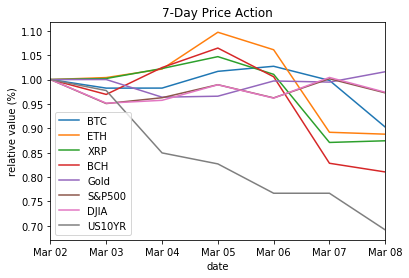

In [80]:
# plot changes in relative value
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

rel_val_df = week_df.T
rel_val_df = week_df.astype('float64')

rel_val_df = week_df.apply(lambda x: x / x[0])

grid = rel_val_df.plot()
grid.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
grid.set_title("7-Day Price Action")
grid.set_xlabel("date")
grid.set_ylabel("relative value (%)")